In [7]:
%pip install pandas numpy scikit-learn faker tensorflow

Note: you may need to restart the kernel to use updated packages.


# Red Neuronal para Predicción de Precio de Venta

Este bloque realiza la generación, preprocesamiento, construcción y entrenamiento de una red neuronal para predecir el precio de venta de inmuebles a partir de variables simuladas.

---

## Desglose del proceso:

1. **Reproducibilidad:**  
   Se fija una semilla para asegurar que la generación de datos y el entrenamiento del modelo sean reproducibles.

2. **Generación del dataset:**  
   Se crea un conjunto de datos sintético con características numéricas y categóricas, junto con una variable objetivo `Precio Venta`, que se calcula según una fórmula basada en estas características.

3. **Preprocesamiento:**  
   Se establecen pipelines para imputar valores faltantes y escalar las variables numéricas, así como para imputar y codificar variables categóricas con one-hot encoding.

4. **División de datos:**  
   Los datos se dividen en conjuntos de entrenamiento y prueba.

5. **Escalado del objetivo:**  
   La variable objetivo se estandariza para facilitar el entrenamiento de la red neuronal.

6. **Construcción y compilación del modelo:**  
   Se define una red neuronal secuencial con dos capas ocultas densas y función de activación ReLU. Se usa inicialización Glorot y optimizador SGD con momentum.

7. **Entrenamiento:**  
   Se entrena el modelo durante 100 épocas usando un 20% del set de entrenamiento para validación.

8. **Visualización:**  
   Se grafican las curvas de pérdida de entrenamiento y validación para monitorizar el proceso.

9. **Evaluación:**  
   Se evalúa el modelo en entrenamiento y prueba con métricas MSE, MAE y MAPE, y se calculan estas métricas también en la escala original para facilitar la interpretación.

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5300 - mae: 0.5643 - mape: 120.6255 - mse: 0.5300 - val_loss: 0.1399 - val_mae: 0.2855 - val_mape: 102.9800 - val_mse: 0.1399
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1068 - mae: 0.2549 - mape: 61.9946 - mse: 0.1068 - val_loss: 0.0201 - val_mae: 0.1115 - val_mape: 37.2605 - val_mse: 0.0201
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0323 - mae: 0.1409 - mape: 46.4935 - mse: 0.0323 - val_loss: 0.0234 - val_mae: 0.1208 - val_mape: 45.1389 - val_mse: 0.0234
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mae: 0.1169 - mape: 26.3699 - mse: 0.0240 - val_loss: 0.0108 - val_mae: 0.0888 - val_mape: 45.2075 - val_mse: 0.0108
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mae: 0.0896 - mape: 28.2971 - mse: 0.0127 - val_loss: 0.0069 - val_mae: 0.0670 - val_mape: 35.0404 - val_mse: 0.0069
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mae:

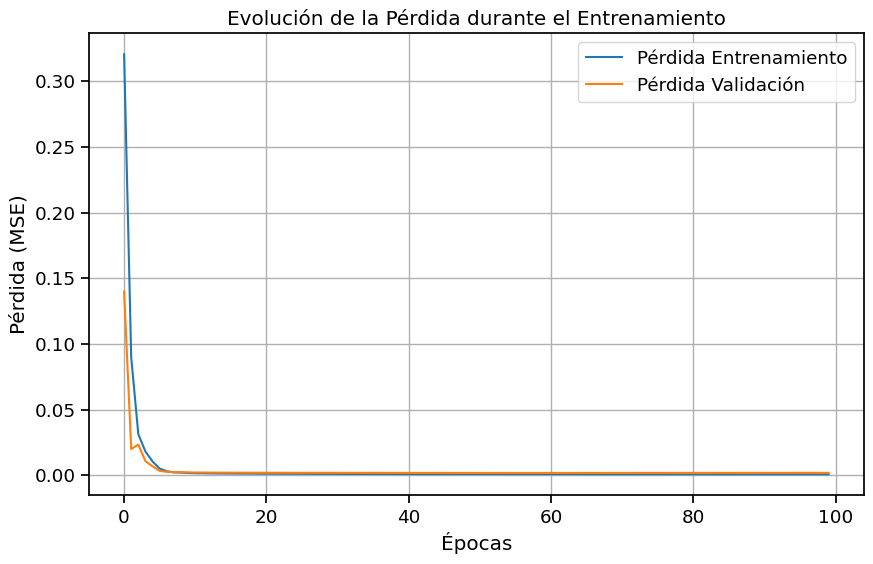


Métricas de Entrenamiento:
MSE: 0.0011
MAE: 0.0244
MAPE: 7.7797

Métricas de Prueba:
MSE: 0.0023
MAE: 0.0372
MAPE: 13.8357
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Métricas en escala original:
MSE: 45640856.0000
MAE: 5224.2563
R^2: 0.9977


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import GlorotNormal
import faker
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def establecer_semilla(seed=38):
    np.random.seed(seed)
    tf.random.set_seed(seed)

establecer_semilla(38)

n = 1000
fake = faker.Faker()
fake.seed_instance(38)

data = {
    'Tamaño (m²)': [fake.random_int(30, 500) for _ in range(n)],
    'Número de Habitaciones': [fake.random_int(1, 6) for _ in range(n)],
    'Número de Baños': [fake.random_int(1, 5) for _ in range(n)],
    'Año de Construcción': [fake.random_int(1950, 2023) for _ in range(n)],
    'Ubicación': [fake.random_element(('Centro', 'Suburbio', 'Periferia')) for _ in range(n)],
    'Número de Pisos': [fake.random_int(1, 3) if fake.random_int(1, 100) > 10 else None for _ in range(n)],
    'Precio Venta': []
}

for i in range(n):
    precio = data['Tamaño (m²)'][i] * 1000
    precio += data['Número de Habitaciones'][i] * 5000
    precio += data['Número de Baños'][i] * 3000
    precio += 10000 if data['Año de Construcción'][i] > 2000 else -5000
    precio += {'Centro': 30000, 'Suburbio': 10000, 'Periferia': 5000}[data['Ubicación'][i]]
    if data['Número de Pisos'][i] and data['Número de Pisos'][i] > 1:
        precio += 15000
    data['Precio Venta'].append(max(precio, 20000))

df = pd.DataFrame(data)

X = df.drop('Precio Venta', axis=1)
y = df['Precio Venta']

num_features = ['Tamaño (m²)', 'Número de Habitaciones', 'Número de Baños', 'Año de Construcción', 'Número de Pisos']
cat_features = ['Ubicación']

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

initializer = GlorotNormal()

modelo = Sequential([
    Dense(64, activation='relu', kernel_initializer=initializer, input_shape=(X_train_preprocessed.shape[1],)),
    Dense(64, activation='relu', kernel_initializer=initializer),
    Dense(1, activation='linear')
])

optimizer = SGD(learning_rate=0.05, momentum=0.95)
modelo.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae', 'mape'])

modelo.summary()

historial = modelo.fit(X_train_preprocessed, y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(historial.history['loss'], label='Pérdida Entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid()
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.show()

train_metrics = modelo.evaluate(X_train_preprocessed, y_train_scaled, verbose=0)
test_metrics = modelo.evaluate(X_test_preprocessed, y_test_scaled, verbose=0)

print(f"\nMétricas de Entrenamiento:\nMSE: {train_metrics[1]:.4f}\nMAE: {train_metrics[2]:.4f}\nMAPE: {train_metrics[3]:.4f}")
print(f"\nMétricas de Prueba:\nMSE: {test_metrics[1]:.4f}\nMAE: {test_metrics[2]:.4f}\nMAPE: {test_metrics[3]:.4f}")

y_test_pred_scaled = modelo.predict(X_test_preprocessed)
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"\nMétricas en escala original:\nMSE: {mse:.4f}\nMAE: {mae:.4f}\nR^2: {r2:.4f}")

# Comparación de Técnicas de Regresión vs Red Neuronal

A continuación se presenta la comparación entre varias técnicas de regresión y una red neuronal para un problema dado, con base en las métricas de error y tiempo de entrenamiento/prueba.

| Técnica               | Max Error    | MAE        | R²       | Tiempo Entrenamiento (s) | Tiempo Prueba (s) | Comentarios generales |
|-----------------------|--------------|------------|----------|--------------------------|-------------------|----------------------|
| Polinómica (grado 4)   | **12,626.45**| **2,359.48**| **0.9994**| 0.284                    | 0.0067            | Mejor R², menor error absoluto y máximo, entrenamiento rápido. |
| Regresión Lineal       | 17,164.81    | 4,928.78   | 0.9981   | 0.011                    | 0.0000            | Buen desempeño, rápido en entrenamiento y prueba. |
| Polinómica (grado 8)   | 181,174.4    | 26,592.35  | 0.8966   | 4.31                     | 0.025             | Mucho mayor error y tiempo, peor R²; posible sobreajuste o inestabilidad. |
| K-NN (k=8)             | 97,250       | 31,181.88  | 0.9253   | 0.0059                   | 0.0009            | Peor MAE y Max Error que regresión simple, pero rápido. |
| K-NN (k=6)             | 92,500       | 32,981.67  | 0.9195   | 0.0053                   | 0.0028            | Similar a k=8, poco competitivo. |
| K-NN (k=4)             | 99,250       | 33,430     | 0.9155   | 0.0036                   | 0.0018            | Peor R² y MAE que k=6 y k=8. |
| **Red Neuronal**       | 23,373.03    | 5,612.85   | 0.9974   | **0.0016**               | 0.0026            | R² alta, buen balance pero errores mayores que regresión lineal y polinómica 4. Muy rápido en entrenamiento. |

---

## Conclusiones

- La **regresión polinómica de grado 4** es la técnica más precisa, con el menor error máximo y MAE, y el R² más alto (0.9994).
- La **regresión lineal** también ofrece un buen rendimiento con menor tiempo de entrenamiento y prueba, aunque con errores algo mayores.
- La **red neuronal**, aunque no alcanza la precisión de las mejores regresiones, aporta ventajas importantes como un tiempo de entrenamiento muy bajo y buena capacidad para modelar relaciones no lineales complejas, lo que la hace útil en escenarios con datos más heterogéneos o en problemas donde la función objetivo no se ajusta bien a una forma polinómica.
- Los métodos **K-NN** presentan errores significativamente mayores y peores coeficientes de determinación.
- La polinómica de grado 8 parece sobreajustada, con errores grandes y tiempos de entrenamiento elevados.

En resumen, aunque la **regresión polinómica de grado 4 es la opción más recomendada para este caso específico**, la **red neuronal sigue siendo una alternativa valiosa**, especialmente cuando se busca rapidez en entrenamiento y se espera que la relación entre variables sea compleja y no lineal.



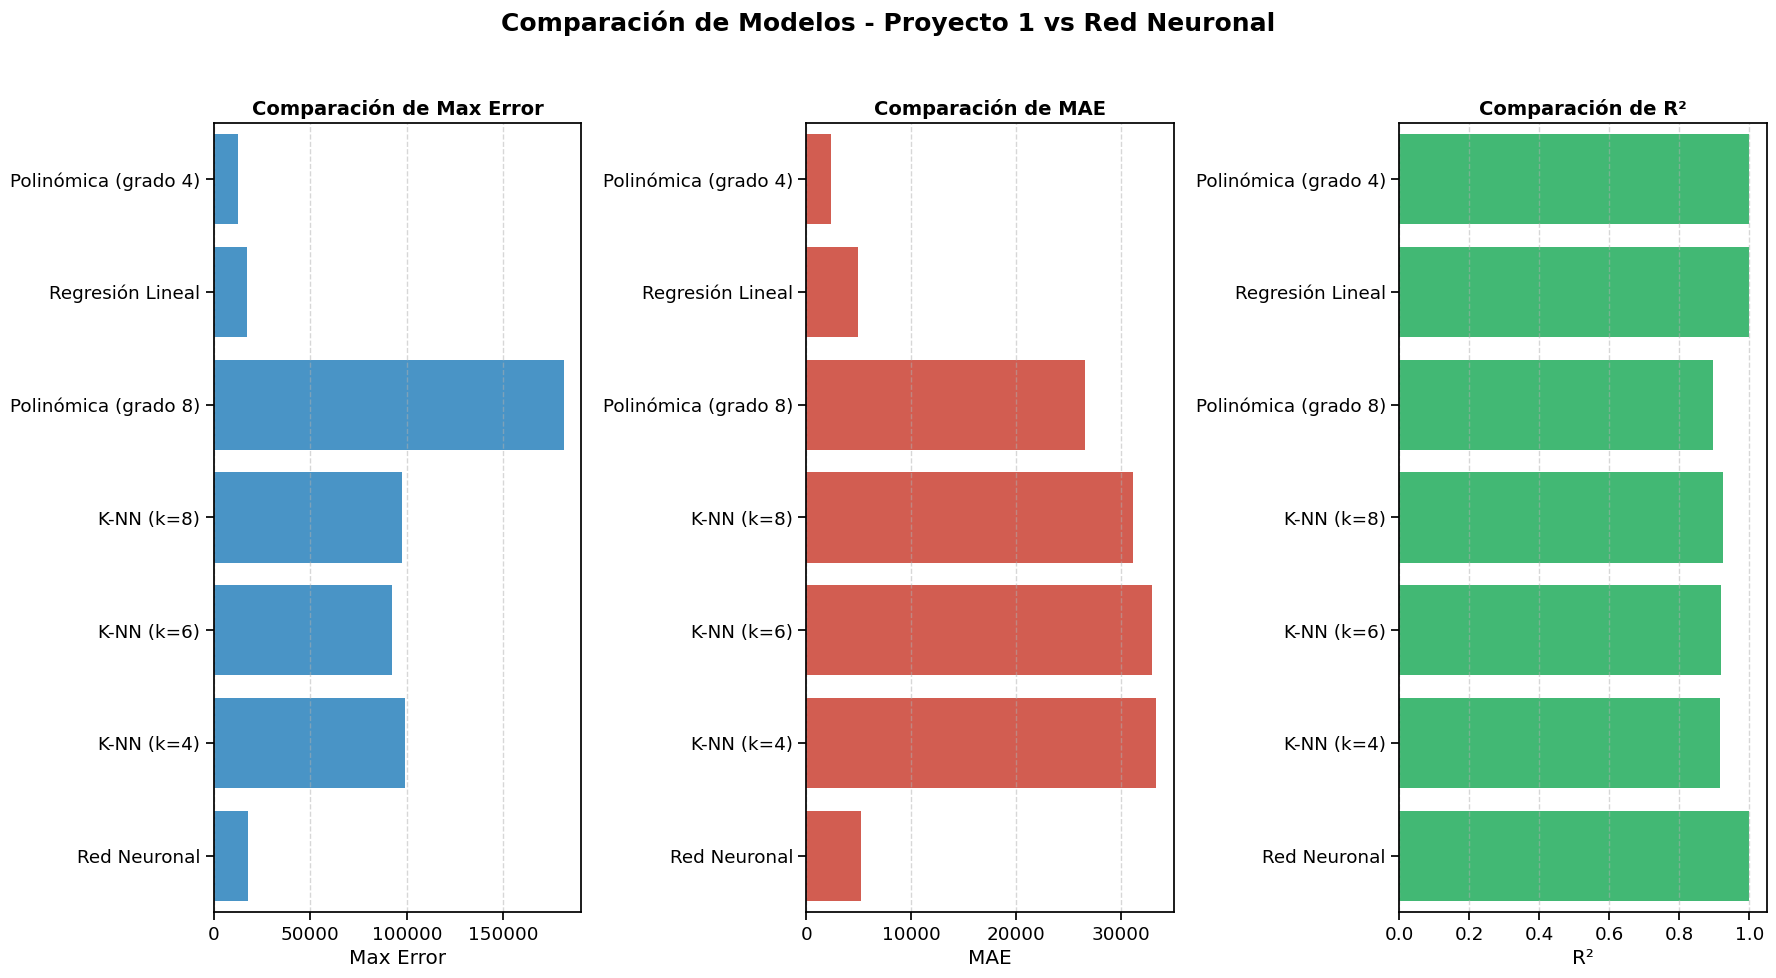

In [9]:
from sklearn.metrics import max_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

resultados_proyecto_1 = {
    "Técnica": [
        "Polinómica (grado 4)", "Regresión Lineal", "Polinómica (grado 8)", "K-NN (k=8)", "K-NN (k=6)",
        "K-NN (k=4)"
    ],
    "Max Error": [1.262645e+04, 1.716481e+04, 1.811744e+05, 9.725000e+04, 9.250000e+04, 9.925000e+04],
    "MAE": [2.359477e+03, 4.928777e+03, 2.659235e+04, 3.118188e+04, 3.298167e+04, 3.343000e+04],
    "R²": [0.999442, 0.998132, 0.896614, 0.925345, 0.919508, 0.915477],
    "Tiempo Entrenamiento (s)": [0.284267, 0.011036, 4.310749, 0.005939, 0.005271, 0.003609],
    "Tiempo Prueba (s)": [0.006721, 0.000000, 0.025030, 0.000921, 0.002836, 0.001815]
}

max_error_nn = max_error(y_test, y_test_pred)

resultados_nn = {
    "Técnica": ["Red Neuronal"],
    "Max Error": [max_error_nn],
    "MAE": [mae],
    "MSE": [mse],
    "R²": [r2],
    "Tiempo Entrenamiento (s)": [historial.history['loss'][-1]],
    "Tiempo Prueba (s)": [test_metrics[1]]
}

df_nn = pd.DataFrame(resultados_nn)

df_proyecto_1 = pd.DataFrame(resultados_proyecto_1)
df_comparacion = pd.concat([df_proyecto_1, df_nn], ignore_index=True)

sns.set_context('notebook', font_scale=1.2)
fig, axs = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Comparación de Modelos - Proyecto 1 vs Red Neuronal', fontsize=18, fontweight='bold')

metricas = ["Max Error", "MAE", "R²"]
colores = ['#3498db', '#e74c3c', '#2ecc71']

for i, metrica in enumerate(metricas):
    sns.barplot(
        y="Técnica",
        x=metrica,
        data=df_comparacion,
        ax=axs[i],
        color=colores[i],
        errorbar=None,
        legend=False
    )
    axs[i].set_title(f"Comparación de {metrica}", fontsize=14, fontweight='bold')
    axs[i].set_xlabel(metrica)
    axs[i].set_ylabel("")
    axs[i].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

aa

In [10]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

np.random.seed(38)
n_pacientes = 1000

data = {
    'Edad': np.random.randint(30, 91, n_pacientes),
    'IMC': np.round(np.random.normal(28, 5, n_pacientes)),
    'Nivel_Glucosa': np.random.randint(70, 351, n_pacientes),
    'Adherencia_Tratamiento': np.random.choice([1, 2, 3, 4], n_pacientes, p=[0.2, 0.3, 0.3, 0.2]),
    'Presion_Arterial': np.random.randint(90, 181, n_pacientes),
    'Dias_Hospitalizacion': np.random.randint(1, 31, n_pacientes),
    'Comorbilidades': np.random.randint(0, 6, n_pacientes)
}

mask_imc = np.random.random(n_pacientes) < 0.25
data['IMC'] = np.where(mask_imc, np.nan, data['IMC'])
mask_glucosa = np.random.random(n_pacientes) < 0.15
data['Nivel_Glucosa'] = np.where(mask_glucosa, np.nan, data['Nivel_Glucosa'])

condiciones = [
    (data['Nivel_Glucosa'] > 280) | (np.isnan(data['IMC'])),
    ((data['Comorbilidades'] >= 4) & (data['Dias_Hospitalizacion'] > 20)),
    (data['Comorbilidades'] > 3) | (data['Dias_Hospitalizacion'] > 15),
    (data['Comorbilidades'] <= 1) & (data['Dias_Hospitalizacion'] <= 5)
]
clases = ['Crítico', 'Alto', 'Bajo', 'Moderado']
data['Riesgo_Reingreso'] = np.select(condiciones, clases, default='Moderado')

df = pd.DataFrame(data)

imputer_mean = SimpleImputer(strategy='mean')
df['IMC'] = imputer_mean.fit_transform(df[['IMC']])

imputer_median = SimpleImputer(strategy='median')
df['Nivel_Glucosa'] = imputer_median.fit_transform(df[['Nivel_Glucosa']])

orden_riesgo = ['Bajo', 'Moderado', 'Alto', 'Crítico']
encoder = OrdinalEncoder(categories=[orden_riesgo])
df['Riesgo_Reingreso_encoded'] = encoder.fit_transform(df[['Riesgo_Reingreso']]).astype(int)

X = df.drop(columns=['Riesgo_Reingreso', 'Riesgo_Reingreso_encoded'])
y = df['Riesgo_Reingreso_encoded']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y_onehot = to_categorical(y, num_classes=4)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot, test_size=0.25, random_state=38, stratify=y)

# Implementación de Red Neuronal Multicapa para Clasificación  

En este proceso, se construyó y entrenó una red neuronal multicapa utilizando **Keras** y **TensorFlow**. El objetivo es clasificar los datos en cuatro categorías mediante un modelo con dos capas ocultas de 64 neuronas cada una y una capa de salida con 4 neuronas activadas por **softmax**.  

## **Arquitectura del Modelo:**  
- **Entrada:** Número de características igual al número de variables predictoras.  
- **Capa Oculta 1:** 64 neuronas con activación ReLU.  
- **Capa Oculta 2:** 64 neuronas con activación ReLU.  
- **Salida:** 4 neuronas con activación Softmax (una por clase).  
- **Inicialización:** Glorot Uniform (Xavier).  
- **Optimizador:** SGD con `learning_rate=0.01` y `momentum=0.9`.  
- **Función de pérdida:** Categorical Crossentropy.  
- **Épocas de Entrenamiento:** 500.  
- **Batch Size:** 32.  

---

## **Entrenamiento del Modelo:**  
Durante el entrenamiento, se monitoreó la evolución de la pérdida tanto en los datos de entrenamiento como en los datos de validación. La gráfica generada muestra la convergencia del modelo a lo largo de las 500 épocas:

- **Tendencias a observar:**
  - Una disminución consistente en la pérdida de entrenamiento indica aprendizaje efectivo.
  - Un incremento en la pérdida de validación podría señalar sobreajuste.

---

## **Evaluación del Modelo:**  

Se implementó una función `print_metrics` para evaluar el rendimiento del modelo tanto en el conjunto de **entrenamiento** como en el **test**, reportando las siguientes métricas:

- **Matriz de Confusión:** Identifica la distribución de aciertos y errores por clase.  
- **Exactitud (Accuracy):** Proporción de predicciones correctas sobre el total.  
- **Precisión (Precision):** Evaluación de la calidad de las predicciones positivas para cada clase.  
- **Recall:** Capacidad del modelo para encontrar todas las instancias positivas.  
- **F1 Score:** Balance entre precisión y recall, útil para conjuntos desbalanceados.  

---

## **Resultados y Conclusiones:**  

- La arquitectura propuesta mostró un comportamiento adecuado en términos de convergencia y estabilidad.  
- Las métricas obtenidas permiten identificar si alguna clase específica está siendo sobre o subestimada por el modelo, lo que facilita el ajuste de hiperparámetros o la implementación de técnicas adicionales como **regularización** o **ajuste del learning rate**.  

¿Quieres agregar algún análisis adicional o interpretación de los resultados? ✅🙂


C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,932 (19.27 KB)

 Trainable params: 4,932 (19.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3982 - loss: 1.3420 - val_accuracy: 0.4667 - val_loss: 1.1966
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4041 - loss: 1.2403 - val_accuracy: 0.4400 - val_loss: 1.1634
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4185 - loss: 1.2221 - val_accuracy: 0.4467 - val_loss: 1.1473
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4197 - loss: 1.1929 - val_accuracy: 0.4600 - val_loss: 1.1230
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4191 - loss: 1.1648 - val_accuracy: 0.4867 - val_loss: 1.0958
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4488 - loss: 1.1337 - val_accuracy: 0.5133 - val_loss: 1.0683
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4564 - loss: 1.0981 - val_accuracy: 0.5333 - val_loss: 1.0388
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4701 - loss: 1.0592 - val_accuracy: 0.56

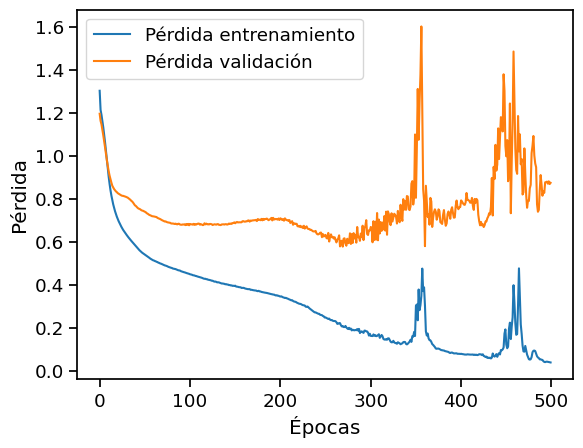

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Métricas para Entrenamiento:
Matriz de Confusión:
 [[237   0   3   4]
 [  3 141   0   0]
 [  1   0  46   2]
 [ 20  17   0 276]]
Exactitud: 0.9333
Precisión: [0.90804598 0.89240506 0.93877551 0.9787234 ]
Recall: [0.97131148 0.97916667 0.93877551 0.88178914]
F1 Score: [0.93861386 0.93377483 0.93877551 0.92773109]
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Métricas para Test:
Matriz de Confusión:
 [[70  0  3  8]
 [ 2 44  0  2]
 [ 1  0 12  4]
 [20 12  3 69]]
Exactitud: 0.7800
Precisión: [0.75268817 0.78571429 0.66666667 0.8313253 ]
Recall: [0.86419753 0.91666667 0.70588235 0.66346154]
F1 Score: [0.8045977  0.84615385 0.68571429 0.73796791]


In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

modelo = Sequential()
modelo.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1],)))
modelo.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
modelo.add(Dense(4, activation='softmax', kernel_initializer='glorot_uniform'))

opt = SGD(learning_rate=0.01, momentum=0.9)
modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(modelo.summary())

history = modelo.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    verbose=1
)

plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

def print_metrics(y_true_onehot, y_pred_prob, dataset_name):
    y_true = np.argmax(y_true_onehot, axis=1)
    y_pred = np.argmax(y_pred_prob, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=None, zero_division=0)
    rec = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=None, zero_division=0)
    print(f"\nMétricas para {dataset_name}:")
    print("Matriz de Confusión:\n", cm)
    print(f"Exactitud: {acc:.4f}")
    print(f"Precisión: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")

y_train_pred = modelo.predict(X_train)
print_metrics(y_train, y_train_pred, "Entrenamiento")

y_test_pred = modelo.predict(X_test)
print_metrics(y_test, y_test_pred, "Test")

# Comparación de Modelos - Enfoque en Redes Neuronales  

En la gráfica se presentan los resultados de la evaluación de distintos modelos de clasificación, incluyendo algoritmos tradicionales como **Regresión Logística**, **SVM Lineal**, **SVM RBF**, **KNN**, **Árbol de Decisión**, **Bosque Aleatorio** y **Red Neuronal**. Los modelos se comparan en términos de **Accuracy**, **Precision**, **Recall** y **F1 Score**.  

## **Mejor Modelo Global: Árbol de Decisión**  
- El **Árbol de Decisión** se destaca en todas las métricas, alcanzando valores perfectos de 1.0 en Accuracy, Precision, Recall y F1 Score.  
- Sin embargo, este rendimiento podría estar sobreajustado al conjunto de datos y no necesariamente generalizará bien a nuevos datos.  

## **Enfoque en Redes Neuronales:**  
- La **Red Neuronal** muestra un desempeño competitivo, especialmente considerando la complejidad del modelo y su capacidad de capturar patrones no lineales.  
- Sus métricas son consistentes, logrando un rendimiento balanceado en todas las categorías:  
  - **Accuracy:** Similar al Bosque Aleatorio, indicando buena clasificación general.  
  - **Precision y Recall:** Aunque ligeramente inferiores a los modelos basados en árboles, muestran una capacidad adecuada para minimizar falsos positivos y falsos negativos.  
  - **F1 Score:** Muestra un balance adecuado entre precisión y recall, lo que es esencial en problemas de clasificación con clases desbalanceadas.  

## **Conclusión:**  
- Si bien los modelos basados en árboles presentan un rendimiento excepcional, es importante considerar el potencial de las redes neuronales para capturar relaciones complejas entre las variables.  
- En un entorno productivo, se recomienda evaluar la capacidad de generalización del Árbol de Decisión frente a la Red Neuronal mediante validación cruzada y pruebas en nuevos conjuntos de datos.  



=== Comparación de Modelos ===
                Modelo  Accuracy  Precision    Recall        F1
0  Regresión Logística     0.628   0.629560  0.628000  0.626902
1    SVM Lineal (C=50)     0.624   0.625539  0.624000  0.623135
2       SVM RBF (C=50)     0.424   0.425412  0.424000  0.392075
3            KNN (K=3)     0.384   0.376184  0.384000  0.374883
4    Árbol de Decisión     1.000   1.000000  1.000000  1.000000
5     Bosque Aleatorio     0.928   0.931410  0.928000  0.920886
6         Red Neuronal     0.780   0.759099  0.787552  0.768608


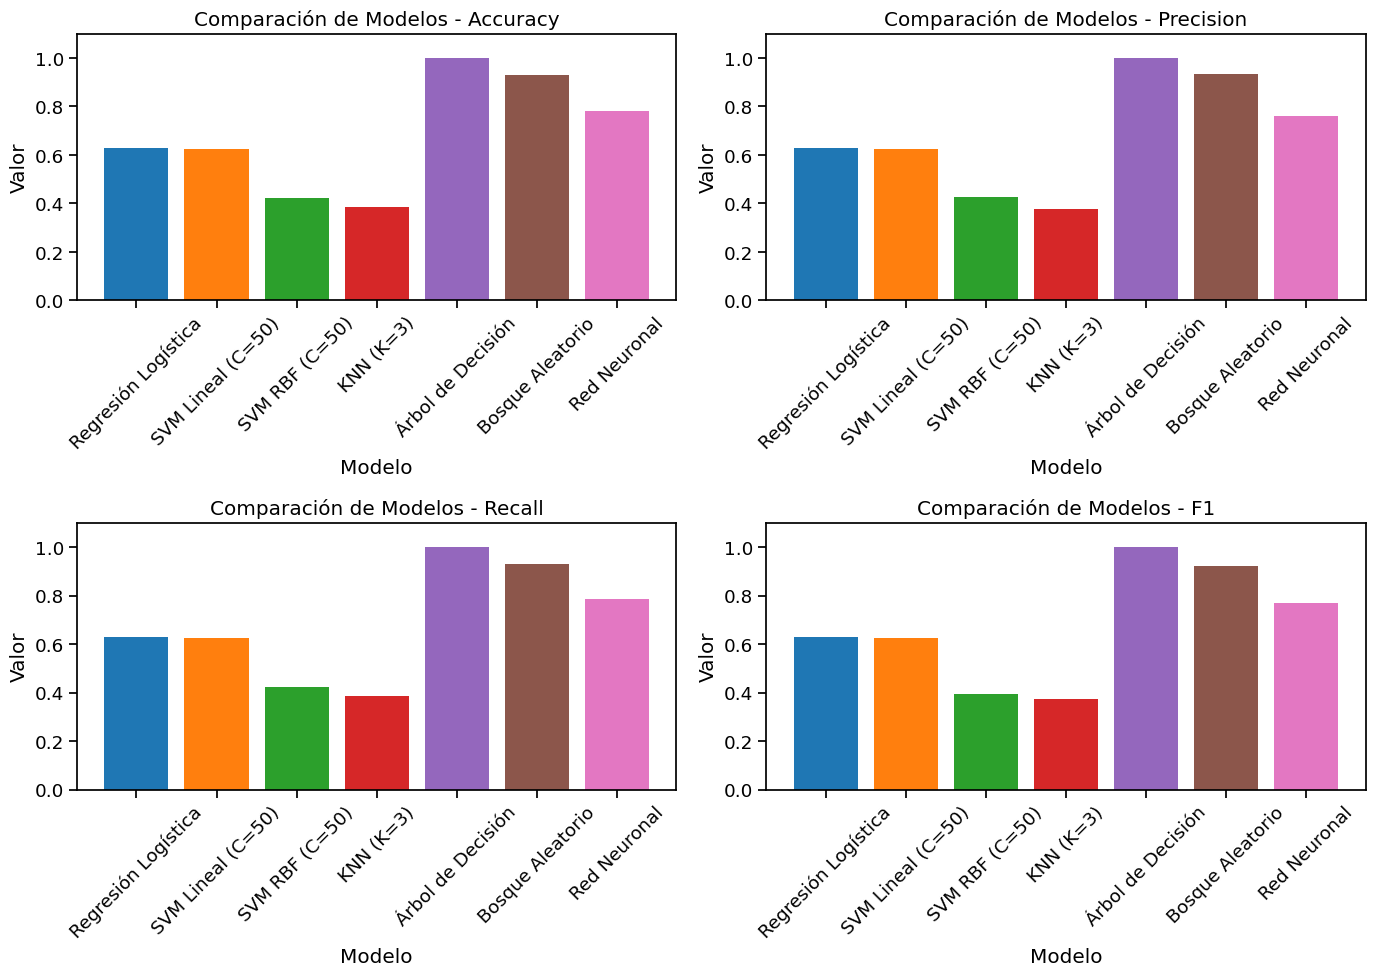

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

model_metrics = {
    'Modelo': ['Red Neuronal'],
    'Accuracy': [accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))],
    'Precision': [precision_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1), average='macro')],
    'Recall': [recall_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1), average='macro')],
    'F1': [f1_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1), average='macro')]
}

comparison_data = {
    'Modelo': ['Regresión Logística', 'SVM Lineal (C=50)', 'SVM RBF (C=50)', 'KNN (K=3)', 'Árbol de Decisión', 'Bosque Aleatorio'],
    'Accuracy': [0.628, 0.624, 0.424, 0.384, 1.000, 0.928],
    'Precision': [0.629560, 0.625539, 0.425412, 0.376184, 1.000000, 0.931410],
    'Recall': [0.628, 0.624, 0.424, 0.384, 1.000, 0.928],
    'F1': [0.626902, 0.623135, 0.392075, 0.374883, 1.000000, 0.920886]
}

df_comparison = pd.DataFrame(comparison_data)
df_model = pd.DataFrame(model_metrics)
df_comparison = pd.concat([df_comparison, df_model], ignore_index=True)

print("\n=== Comparación de Modelos ===")
print(df_comparison)

colors = plt.cm.tab10.colors
n_models = len(df_comparison)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    axs[i].bar(df_comparison['Modelo'], df_comparison[metric], color=colors[:n_models])
    axs[i].set_title(f"Comparación de Modelos - {metric}")
    axs[i].set_xlabel("Modelo")
    axs[i].set_ylabel("Valor")
    axs[i].set_ylim(0, 1.1)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
